# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EaonbI8dXvFHr5I75zUAhGEBXflfC4aZEqtcxPYHS5Jciw?e=s6UTbq)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/ETaVN6doTnJElS0Egw34XYQB_VYCwijjNk_05Ft4RctYjg?e=X8iVbw)

There are two parts.
- Part 1 is related to predicting COVID-19 deaths
- Part 2 is open ended and you can find the problem of your interest as long as it is related to COVID-19. The only requirements are the following:
    - The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression. This means either you are working with continous numerical data or classification. You are not allowed to use Neural Networks or other Machine Learning models.
    - You must use Python and Jupyter Notebook

The following tasks are a general guide to help you do your project for Part 2:
1. Find an interesting problem which you can solve either using Linear Regression or Classification
1. Find a dataset to build your model. You can use [Kaggle](https://www.kaggle.com/datasets) to find your datasets.
1. Use plots to visualize and understand your data.
1. Create training and test data set.
1. Build your model
1. Use metrics to evaluate your model.
1. Improve your model

## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Rubrics

The rubrics for the scoring can be found in [this link](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EdLkuzyCrrJBp5QfVGtdHn8Bj3_epWiQMqv2mwyEei_3JQ?e=fLB0QN).

## Students Submission

Student's Name:
- Joyce Lim
- Quek Shao Min Charissa
- Lim Sheng Xiang
- Wang Shiyu
- Jyotit Kaushal

Everyone have equal contributions to this project.

# Part 1

**Dataset** <br>
https://www.kaggle.com/gpreda/covid-world-vaccination-progress & https://www.kaggle.com/gauravduttakiit/covid-19 <br>
These datasets were chosen as it has an extensive amount of data, where it provides data for almost a year. We then choose to combine the above 2 datasets by categorizing them according to their respective dates and countries to obtain a dataset that provides us with most of our desired variables.

**Predictable Variables Chosen** <br>
After in depth research of the variables and plotting each possible variable against the total number of deaths, these 4 variables were chosen as they often have a direct impact on fatalities from Covid-19 and seems to hold a relationship with the number of deaths when plotted.
* Total Confirmed Cases: Fatalities from Covid-19 can only come from confirmed cases
* Total Vaccinations per Hundred: It is proven that vaccination reduces Covid-19 fatality rate as shown in https://www.news-medical.net/amp/news/20211101/The-effect-of-mass-vaccination-on-COVID-19-mortality-in-Israel.aspx
* GDP(USD): GDP measures the size and health of a country's economy, which in turn indicates whether the country have sufficient economical power to lower the fatalities due to Covid-19
* Current Positive Cases: Future fatalities from Covid-19 can only come from current positive cases

**Cleaning of data** <br>
A total of 21 countries and 3150 data points were chosen to ensure that the size of the data set is big enough to obtain a higher accuracy for the model. The final dataset was obtained via combining the above 2 datasets from 2021/2/1 to 2021/6/30 to prevent the influence of other variables that were not chosen. The data points with incomplete data was also removed to prevents errors in the code. 

### Basic functions 
This cell below contains the basic functions that will be used to build our **Multiple Linear Regression Model**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math

In [2]:
# normalize the feature using z normalization
def normalize_z(df):
    dfout = df.copy()
    dfout = (df - df.mean(axis = 0)) / df.std(axis = 0)
    return dfout

# get the columns for the features and the targets from the input argument data frame
def get_features_targets(df, feature_names, target_names):
    df_feature = pd.DataFrame(df[feature_names])
    df_target = pd.DataFrame(df[target_names])
    return df_feature, df_target

# convert the data frame to a numpy array and change it into a column vector
def prepare_feature(df_feature):
    cols = len(df_feature.columns)
    feature = df_feature.to_numpy().reshape(-1, cols)
    X = np.concatenate((np.ones((feature.shape[0], 1)), feature), axis = 1)
    return X

# convert the data frame to a numpy array and change it into a column vector
def prepare_target(df_target):
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1, cols)
    return target

#standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s
def predict(df_feature, beta):
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X, beta)

# calculate the straight line equation after standardization and adding of column for constant 1
def predict_norm(X, beta):
    return np.matmul(X, beta)

# compute the cost function of a linear regression model.
def compute_cost(X, y, beta):
    J = 0
    m = X.shape[0]
    error = np.matmul(X, beta) - y
    error_eq = np.matmul(error.T, error)
    J = (1 / (2 * m)) * error_eq
    J = J[0][0]
    return J

# get the coefficients of the model
def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        deriv = np.matmul(X.T, (np.matmul(X, beta) - y))
        beta = beta - alpha * (1/m) * deriv
        J_storage[n] = compute_cost(X, y, beta)
    return beta, J_storage

# get different combinations of all features
def permutation(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

### Class: MultipleLinearRegression
Attributes:
* **_name** : *Name of the model, a string data type*
* **target** : *What we need to predict, a DataFrame type*
* **features** : *Variables used to predict the target, a DataFrame type*
* **_features_name** : *Name of features used, a list type*
* **_beta** : *Coefficients of the model, an np.array type* 

Properties:
* **beta.setter** : *If the input is np.array and its shape is (feature.shape[1]+1, 1), the input will be assigned to _beta attribute. This will return the _beta attribute. Otherwise, this property will not do anything.*
* **beta** : *Calls predict property to compute beta and store it into the _beta attribute. This returns the _beta attribute.*
* **name.setter** : *Ensure that only those of the data type str and a non empty string can be assigned to the _name attribute.*
* **name** : *This returns the _name attribute*
* **features_name** : *This returns the _features_name attribute. There is no setter property for _features_name attribute, so it will not be modified*
* **predict** : *Compute coefficients of model, store it in the _beta attribute and returning the predicted target value*
* **accuracy** : *Compute adjusted R square value which is used as the accuracy of the model*

In [3]:
class MultipleLinearRegression:
    iterations = 1500
    alpha = 0.01
    
    #initialization
    def __init__(self, name, features, target):
        self._name = name
        self.target = target
        self.features = features
        self._features_name = list(features.columns)
        self._beta = np.zeros((features.shape[1]+1,1))
    
    #property getter
    @property
    def beta(self):
        self.predict
        return self._beta
    
    #property setter
    @beta.setter
    def beta(self, value):
        if value.shape == (self.features.shape[1]+1,1):
            self._beta = value
    
    #property getter
    @property
    def name(self):
        return self._name
        
    #property setter
    @name.setter
    def name(self, value):
        if isinstance(value, str) and name != '':
            self._name = value
        
    #property getter
    @property
    def features_name(self):
        return self._features_name
    
    @property
    def predict(self):
        df_features = normalize_z(self.features)
        X = prepare_feature(df_features)
        target = prepare_target(self.target)
        
        #compute the coeffecients of the model and stores it in beta attribute
        beta = np.zeros((self.features.shape[1]+1,1))
        self._beta, J_storage = gradient_descent(X, target, beta, self.alpha, self.iterations) 
        #compute predicted value
        prediction = predict(self.features, self._beta)
        return prediction
    
    @property
    def accuracy(self):
        target = prepare_target(self.target)
        SSres = np.sum((target - self.predict)**2)
        SStot = np.sum((target - np.mean(target))**2)
        n = target.shape[0]
        adjusted_Rsquare = 1 - (n-1)/(n-1-self.features.shape[1])*(SSres/SStot)
        return adjusted_Rsquare
    
    #when printing this class, it returns name attribute
    def __str__(self):
        return self.name

***

As seen from the **MultiLinearRegression class** above, the adjusted R-squared value is chosen as our metric to determine the accuracy of our model as the adjusted R-squared value compares the explantory power of regression models that contain different numbers of predictors. This value will only increase if and only if the new term improves the model more than expected by chance. Similarly, it will decrease when a predictor improves the model by less than expected by chance. Thus, this will be a good metric to compare the accuracy of our model as it provides a more precise view of the correlation by also taking into account how many independent variables are added to our model.

***

### Building The Model
1. Read the data file ('task 1.csv') and get different combinations of all features using the **permutation(s)** function. <br> *Note: in the csv file, our features are named 'Current', 'total_vaccination_per_hundred', 'Confirmed', 'GDP(USD)' while our target is named 'Deaths'.*
2. For each combination of features, extract features and target from the data set. Create an instance of **MultipleLinearRegression class** and add it in a list.
3. Sort the list based on accuracy (computed using adjusted R square value) of each model. The model with the highest accuracy is the best model among all.

In [5]:
df = pd.read_csv('task 1.csv') # read the data file
features_name = ['Current','total_vaccinations_per_hundred','Confirmed', 'GDP(USD)']
target_name = ['Deaths']
features_combinations = list(permutation(features_name))[1:] # get different combinations of all features

model_combinations = []
for i in features_combinations: # use for loop to go through all combinations
    df_features, df_target = get_features_targets(df, i, target_name) # extract features and target
    name_lst = [j[:3] for j in i]
    name = 'md_'+','.join(name_lst) # name the model with the first three letters of each features used
    model = MultipleLinearRegression(name, df_features, df_target) # create an instance of MultipleLinearRegression class
    model_combinations.append(model) # add the instance in a list
    
model_combinations = sorted(model_combinations, key = lambda x: x.accuracy) # sort the list based on accuracy of each element
best_model = model_combinations[-1] # this model has the hightest accuracy, which means it is the best model
for i in model_combinations:
    print(i, i.accuracy)

md_Cur 0.018806786009950227
md_tot 0.04967372345784293
md_GDP 0.0662124352483916
md_Cur,tot 0.07604785451227491
md_tot,GDP 0.09053584643770751
md_Cur,GDP 0.10968212880413297
md_Cur,tot,GDP 0.136751853047968
md_Con 0.7234381246409158
md_Cur,Con 0.7236112835140583
md_Cur,Con,GDP 0.7241549112368599
md_Con,GDP 0.7241849269014577
md_tot,Con 0.909456376930259
md_tot,Con,GDP 0.9181793010664776
md_Cur,tot,Con 0.9327328771042828
md_Cur,tot,Con,GDP 0.9353867889052694


***

As seen from the values obtained, the model with all 4 variables show the highest adjusted R-squared value, which indicates the highest correlation value and is thus the best model to predict the total number of deaths

***

This can also be cross checked using visualizations by plotting actual number of deaths against predicted number of deaths along with a $y=x$ line for each model. The closer the 2 curves are, the higher the accuracy of the model.

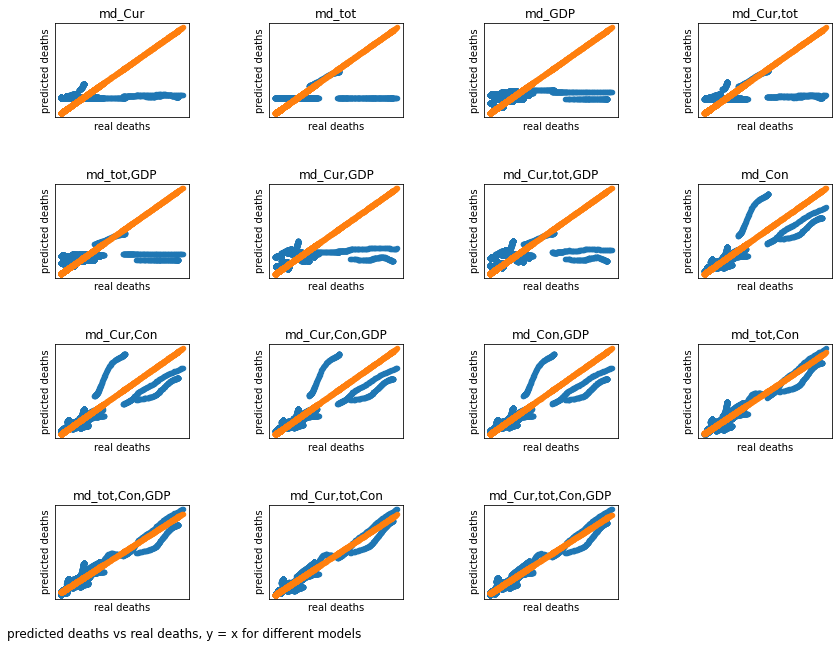

In [6]:
a = math.ceil(math.sqrt(len(model_combinations))) # get the size of the plot
b = 1
for i in model_combinations:
    plt.subplot(a,a,b) # create a subplot with a*a size. b is the index
    plt.scatter(i.target, i.predict,s=20) # plot predicted deaths against real deaths
    plt.scatter(i.target, i.target,s=20) # plot y = x
    plt.xticks([]) # remove x axis
    plt.yticks([]) # remove y axis
    plt.xlabel('real deaths') # add x axis label
    plt.ylabel('predicted deaths') # add y axis label
    plt.title(i.name) # name each plot as the model's name
    plt.suptitle('predicted deaths vs real deaths, y = x for different models',y=-0.1) # add a title for all plots
    plt.subplots_adjust(left=0.2, top=2, right=2, bottom=0, wspace=0.6, hspace=0.7) # adjust the plots
    b+=1

***

As seen from the visualizations above, the model with all 4 variables is the closest to the $y=x$ graph. This further supports the model with all 4 variables to be the most accurate model to predict the total number of deaths. <br>
*Note: Some of these models looks similar to one another, Thus, we cannot rely on our naked eyes to judge what is the best model by only visualization and have to refer to the adjusted R-squared value as well.*

***

### Prediction Model
As seen from the analysis above, the model with all 4 variables shows the highest accuracy (adjusted R-squared value) of 93.55%. Thus, a predicted model can be built to predict total number of deaths. <br>
**predict_deaths(confirm, vaccination_rate, GDP, current)**: this funtion takes in four values: 'Current', 'total_vaccinations_per_hundred', 'Confirmed', 'GDP(USD)' and returns predicted deaths. Since we use normalized data to compute coefficients of the model, they are different from those in excel. To predict deaths, we need to normalize the input value first.

In [7]:
def predict_deaths(confirm, vaccination_rate, GDP, current):
    cur = (current - df['Current'].mean(axis = 0) )/ df['Current'].std(axis = 0)
    tot = (vaccination_rate - df['total_vaccinations_per_hundred'].mean(axis = 0))\
            / df['total_vaccinations_per_hundred'].std(axis = 0)
    con = (confirm - df['Confirmed'].mean(axis = 0) )/ df['Confirmed'].std(axis = 0)
    gdp = (GDP - df['GDP(USD)'].mean(axis = 0) )/ df['GDP(USD)'].std(axis = 0)
    
    features = np.array([1, cur, tot, con, gdp])
    prediction = np.matmul(features, best_model.beta)
    return prediction

# Part 2

### Overview About the Problem

PCR Testing for COVID-19 proves to be a huge problem in bulk, especially for countries being less financially stable I.e. with a smaller relative GDP. This becomes even more problematic considering how the fatality rate shows a correlation with the gdp of a country like we see in Task 1. Therefore, we aim to solve this problem by trying to predict whether an individual patient is COVID positive looking at his symptoms, medical predisposition and possible contact to infected individuals. Hence, diverting the burden of testing away from the PCR method.

### Cleaning up and Preparing the dataset to run the logistic regression model on

Importing the **following dataset**: https://www.kaggle.com/midouazerty/symptoms-covid-19-using-7-machine-learning-98 and using a simple for loop and mapping using a dictionary to convert the column values from the given "Yes" and "No"s to 1s and 0s. The column 'Wearing Mask' and 'Sanitization from Market' were ignored as both columns only give us the value of "No", which does not help us in building our model

Due to the large amount of symptoms, it will be grouped into respective categories as shown below:

- **ColdRelatedSystems**: representing whether an individual experiences cold related symptoms like Fever, a Sore Throat, a Running Nose, etc.
- **OtherSymptoms**: represnts all the other symptoms an individual is experiencing like a Breathing Problem, Hyptertension, etc.
- **MedicalPredisposition**: any medical predisposition towards being positive characterized by having diseases like diabetes, a chronic lung disease, etc.
- **RelativeContact**: any contact the individual may have had with an infected person based on his recent social activity

In [9]:
df=pd.read_csv(r"Covid Dataset.csv") # read the data file
df.columns=df.columns.str.replace(" ", "") # remove space in column name

# change the column values from the "Yes" and "No" to 1s and 0s
df_columns=list(df.columns)
for column in df_columns:
    mapping = {'Yes': 1, 'No': 0}
    df[column] = df[column].map(mapping)

### Basic functions 
This cell below contains the basic functions that will be used to build our **Logistic Regression Model**.

In [10]:
# to normalize the various features using z normalization
def normalize_z(df):
    dfout = df.copy()
    dfout = (dfout - dfout.mean(axis=0)) / dfout.std(axis=0)
    return dfout

# to get the columns for features and target
def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

# preparing the features by adding a row of constant 1s and converting them to numpy arrays
def prepare_feature(df_feature):
    cols = len(df_feature.columns)
    feature = df_feature.to_numpy().reshape(-1, cols)
    X = np.concatenate((np.ones((feature.shape[0],1)), feature), axis=1)
    return X

# preparing the target by converting them to a numpy array
def prepare_target(df_target):
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1, cols)
    return target

# split the Data Frame randomly
# output comtains the train and test set for the features data frame, the train and test set for the target data frame
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test

# creating the confusion matrix
def confusion_matrix(ytrue, ypred, labels):
    output = {}
    keys = itertools.product(labels, repeat=2)
    
    for k in keys:
        output[k] = 0

    for idx in range(ytrue.shape[0]):
        output[(ytrue[idx,0], ypred[idx,0])] += 1
    return output

#main regression function
def log_regression(beta, X):
    return 1/(1+np.exp(np.matmul(-X, beta)))

#cost function of log_regression
def compute_cost_logreg(beta, X, y):
    np.seterr(divide = 'ignore') # set how floating-point error will be handled
    m = len(y)
    J = -(1/m)*np.sum(np.where(y==1, np.log(log_regression(beta, X)), np.log(1-log_regression(beta, X))))
    np.seterr(divide = 'warn')
    return J

#gradient descent for log_regression
def gradient_descent_logreg(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        deriv = np.matmul(X.T, (log_regression(beta, X) - y))
        beta = beta - (alpha * (1/m) * deriv)
        J_storage[n] = compute_cost_logreg(beta, X, y)
    return beta, J_storage

# calculate the straight line equation after standardization and adding of column for constant 1. 
# It returns 1 if the output is bigger than 0.5. Otherwise it returns 0.
def predict_norm(X, beta):
    p = log_regression(beta, X)
    return np.where(p>=0.5, 1, 0)

#standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s
def predict(df_feature, beta):
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X, beta)

# function to generate all subsets of the features to find the most optimized model
def permutation(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]

### Class: LogisticRegression
Attributes:
* **_name** : *Name of the model, a string data type*
* **target** : *What we need to predict, a DataFrame type*
* **features** : *Variables used to predict the target, a DataFrame type*
* **_features_name** : *Name of features used, a list type*
* **_beta** : *Coefficients of the model, an np.array type* 
* **_target_test** : *the test data set for target data frame, a DataFrame type*

Properties:
* **beta.setter** : *If the input is np.array and its shape is (feature.shape[1]+1, 1), the input will be assigned to _beta attribute. This will return the _beta attribute. Otherwise, this property will not do anything.*
* **beta** : *Calls predict property to compute beta and store it into the _beta attribute. This returns the _beta attribute.*
* **name.setter** : *Ensure that only those of the data type str and a non empty string can be assigned to the _name attribute.*
* **name** : *This returns the _name attribute*
* **features_name** : *This returns the _features_name attribute. There is no setter property for _features_name attribute, so it will not be modified*
* **target_test** : *This returns the _target_test attribute*
* **predict** : *Compute coefficients of model using the train data set of features, store it in the _beta attribute and returning the predicted target value for the test data set of features*
* **predict_p** : *Calculate the probability of logistic regression equation.*
* **evaluate** : *Compute precision, specificity, accuracy and sensitivity of the model. Accuracy is used to evaluate the accuracy of the model*

In [11]:
df=pd.read_csv(r"Covid Dataset.csv") # read the data file
df.columns=df.columns.str.replace(" ", "") # remove space in column name

# change the column values from the "Yes" and "No" to 1s and 0s
df_columns=list(df.columns)
for column in df_columns:
    mapping = {'Yes': 1, 'No': 0}
    df[column] = df[column].map(mapping)

In [12]:
class LogisticRegression:
    iterations=1000
    alpha=0.01
    
    def __init__(self, name, features, target):
        self._name = name
        self.target = target
        self.features = features
        self._features_name = list(features.columns)
        self._beta = None
        self._target_test = None
    
    #property getter
    @property
    def beta(self):
        self.predict
        return self._beta
    
    #property setter
    @beta.setter
    def beta(self, value):
        if value.shape == (self.features.shape[1]+1,1):
            self._beta = value
    
    #property getter
    @property
    def name(self):
        return self._name
        
    #property setter
    @name.setter
    def name(self, value):
        if isinstance(value, str) and name != '':
            self._name = value
        
    #property getter
    @property
    def features_name(self):
        return self._features_name
    
    @property
    def target_test(self):
        self.predict
        return self._target_test
    
    @property
    def predict(self):
        df_features_train, df_features_test, df_target_train, df_target_test = \
        split_data(self.features, self.target, random_state=100, test_size=0.3)
        df_features_train_z = normalize_z(df_features_train)
        features = prepare_feature(df_features_train_z)
        target = prepare_target(df_target_train)
        beta = np.zeros((features.shape[1],1))
        self._beta, J_storage = gradient_descent_logreg(features, target, beta, self.alpha, self.iterations)
        prediction = predict(df_features_test, self._beta)
        self._target_test = df_target_test
        return prediction
    
    @property
    def predict_p(self):
        self.predict
        df_features_train, df_features_test, df_target_train, df_target_test = split_data(self.features, self.target, random_state=100, test_size=0.3)
        X = prepare_feature(normalize_z(df_features_test))
        p = log_regression(self.beta, X)
        return p 
    
    @property
    def evaluate(self):
        pred = self.predict
        cm = confusion_matrix(self.target_test.values, pred, [1,0])
        pospos = cm[(1,1)]
        posneg = cm[(1,0)]
        negpos = cm[(0,1)]
        negneg = cm[(0,0)]

        accuracy = (pospos + negneg) / np.sum(list(cm.values()))
        sensitivity = pospos / (pospos + posneg)
        specificity = negneg / (negpos + negneg)
        precision = pospos / (pospos + negpos)

        result = {'accuracy': accuracy, 'sensitivity': sensitivity,
                  'specificity': specificity, 'precision': precision}
        return result

    #when printing this class, it returns name attribute
    def __str__(self):
        return self._name

### Building Model

1. Merge the several columns present in our extensive dataset into new columns based on different prediction categories to get relevant and meaningful beta values for the model and hence prediction. All categories are in **categories** variable. It is a dictionary whose keys are the names of categories and values are abbreviations of categories.
2. Get different combinations of all categories using the **permutation(s)** function.
3. For each combination of features, extract features and target from the data set. Create an instance of **LogisticRegression class** and add it in a list.
4. Sort the list based on accuracy (computed using (true positive+true negative)/total cases) of each model. The model with the highest accuracy is the best model among all.

In [13]:
target_name = ["COVID-19"] 

# categorize all columns and create new columns for categories to be used as features for our model
categories = {"ColdRelatedSymptoms":"CRSym", "OtherSymptoms":"OSym", "MedicalPredispositon":"MPre", "RelativeContact":"RCon"}
df["ColdRelatedSymptoms"]=df["Fever"]+df["DryCough"]+df["Sorethroat"]+df["RunningNose"]+df["Headache"]
df["OtherSymptoms"]=df["BreathingProblem"]+df["Asthma"]+df["HyperTension"]+df["Fatigue"]+df["Gastrointestinal"]
df["MedicalPredispositon"]=df["ChronicLungDisease"]+df["HeartDisease"]+df["Diabetes"]
df["RelativeContact"]=df["Abroadtravel"]+df["ContactwithCOVIDPatient"]+df["AttendedLargeGathering"]+\
    df["VisitedPublicExposedPlaces"]+df["FamilyworkinginPublicExposedPlaces"]

# get different combinations of all features
categories_combinations = list(permutation(list(categories.keys())))[1:]

model_combinations = []
for i in categories_combinations: # use for loop to go through all combinations
    df_features, df_target = get_features_targets(df, i, target_name) # extract features and target
    name_lst = [categories[j] for j in i]
    name = 'md_'+','.join(name_lst) # name the model with the abbreviation of each features used
    model = LogisticRegression(name, df_features, df_target) # create an instance of LogisticRegression class
    model_combinations.append(model)  # add the instance in a list

# sort the list based on accuracy of each element
model_combinations = sorted(model_combinations, key = lambda x: x.evaluate['accuracy']) 
# this model has the hightest accuracy, which means it is the best model
best_model = model_combinations[-1] 
for i in list(categories.keys()):
    print(i, df[i].mean(axis=0),df[i].std(axis=0))

ColdRelatedSymptoms 3.3531468531468533 1.1413380431628153
OtherSymptoms 2.6074714758925284 1.1230018685536955
MedicalPredispositon 1.4125874125874125 0.8570770574780427
RelativeContact 2.3498343761501657 1.2990223320370353


### Evaluating the Model

As seen from the values obtained, the model with all 4 features show the accuracy value, which indicates the highest correlation value and is thus the best model to predict if one is Covid-positive or not.

We then go on to plot the results from all different iterations of the testing to finally settle on the one giving us the highest accuracy.

Text(0.5, 1.0, 'md_CRSym,OSym,MPre,RCon')

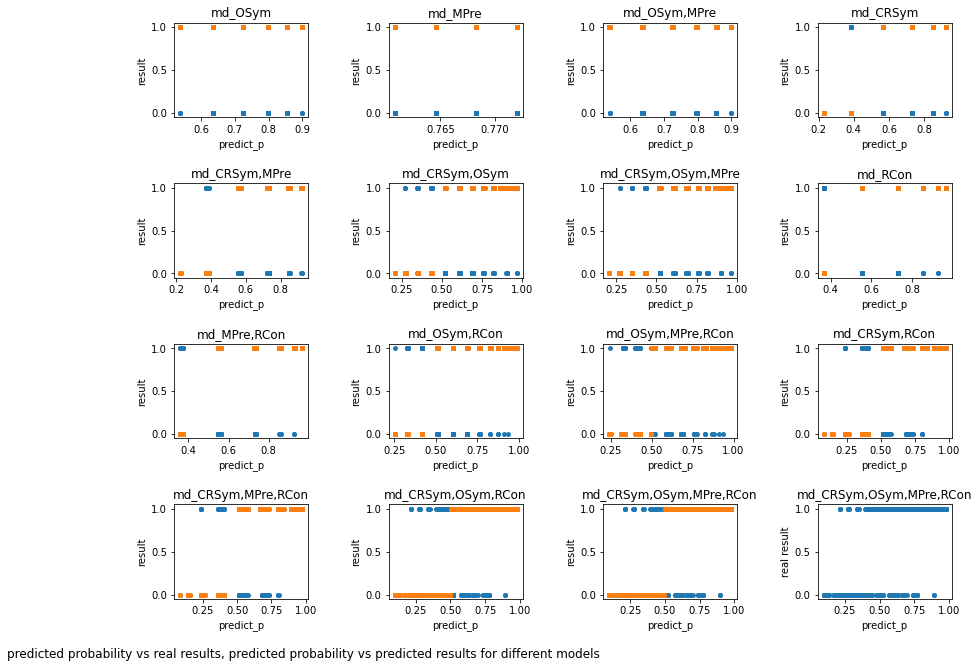

In [14]:
a = math.ceil(math.sqrt(len(model_combinations)+1)) # get the size of the plot
b = 1

for i in model_combinations:
    plt.subplot(a,a,b)
    # create a subplot with a*a size. b is the index
    plt.scatter(i.predict_p, i.target_test,s=15)
    plt.scatter(i.predict_p, i.predict,s=15) # plot predicted deaths against real deaths
    #plt.xticks([]) # remove x axis
    #plt.yticks([]) # remove y axis
    plt.xlabel('predict_p') # add x axis label
    plt.ylabel('result') # add y axis label
    plt.title(i.name) # name each plot as the model's name
    plt.suptitle('predicted probability vs real results, predicted probability vs predicted results for different models'\
                 ,y=-0.17) # add a title for all plots
    plt.subplots_adjust(left=0.2, top=2, right=2, bottom=0, wspace=0.6, hspace=0.7) # adjust the plots
    b+=1
    
plt.subplot(a,a,b)
plt.scatter(i.predict_p, i.target_test,s=15)
plt.xlabel('predict_p') # add x axis label
plt.ylabel('real result') # add y axis label
plt.title(i.name) # name each plot as the model's name

***

As seen from the graphs obatined above, the model with all 4 variables have the highest accuracy when it comes to predicting whether an individual will be diagnosed Covid positive.

***

### Prediction Model
A function named **predict_result(crysm, osym, mprd, rc)** will then be created from the best model to form the prediction model.

This funtion takes in five categories of symptoms - Cold Related Symptoms, Other Symptoms, Medical Predispositon, Relative Contact and Attended Large Gathering. The symptoms of each category is as listed:
* Cold Related Symptoms: Headache, Sorethroat, DryCough, Fever, RunningNose
* Other Symptoms: Breathing Problem, Asthma, Hyper Tension, Fatigue, Gastrointestinal
* Medical Predispositon: Chronic Lung Disease, Heart Disease, Diabetes
* Relative Contact: Abroad travel, Contact with COVID Patient, Attended Large Gathering, Visited Public Exposed Places, Family working in Public Exposed Places

The input value for each category is determined by the number of symptoms shown within the categories.

If the predicted value is 1, it means you may be positive. If it is 0, it means you may be negative.

In [12]:
def predict_result(crsym, osym, mprd, rc):
    crsym = (crsym - df['ColdRelatedSymptoms'].mean(axis = 0) )/ df['ColdRelateSymptoms'].std(axis = 0)
    osym = (osym - df['OtherSymptoms'].mean(axis = 0))\
            / df['OtherSymptoms'].std(axis = 0)
    mprd = (mprd - df['MedicalPredisposition'].mean(axis = 0) )/ df['MedicalPredisposition'].std(axis = 0)
    rc = (rc - df['RelativeContacts'].mean(axis = 0) )/ df["RelativeContacts"].std(axis = 0)
    
    features = np.array([1, crysm, osym, mprd, rc])
    prediction = np.matmul(features, best_model.beta)
    return prediction

## Improving the Model

We strongly believe any model, no matter how accurate, can ever be perfect or be able to use the model in a real world setting especially with the target being something as sensitive as the COVID result of a patient.

For our problem statement, we highly believe we'll be able to benefit with a more profound and detailed dataset that goes into details about symptoms like fever, cough, etc. on a surface level (i.e. a Yes or No) but rather maybe uses a more developed system of capturing metrics from a scale of 1-10, etc. We are also able to include other more quantitative symptoms/states such as the blood lymphocyte levels, etc. which have been proven to be a good indicator of the disease by several studies much like this one [here](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01266-z).

Another more general approach specific to our model and dataset here can be to brainstorm different related features that may be even more accurate in predicting COVID-19 test. We however have not chosen to do that considering:
1. we were able to achieve a 92% accuracy by defining and using features like "ColdRelatedSymptoms", "MedicalPredispositon", etc. for our model.
2. Furthermore, our accuracy of the model is already higher than the accuracy of a PCR test which has an accuracy of 85%.

However, after exploring with the categorization of each category, it became noticable that by grouping many of the symptoms into one category, we are undermining and ignoring the difference in significance level of each symptom and simply giving all the symptoms in the same category the same weight value. Thus, further exploration is done by expanding out the different categories and create a model using all symptoms except 'Wearing Masks' and 'Sanitization from Market (reason is mentioned above).

In [17]:
df = pd.read_csv('Covid Dataset.csv')
df = df.drop(columns=['Wearing Masks', 'Sanitization from Market'])
columns = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose',
       'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease',
       'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ',
       'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places']

# replace the target values using from string to integer 0 and 1
for column in df:
    mapping = {'Yes': 1, 'No': 0}
    df[column] = df[column].map(mapping)

# extract the features and the target columns
df_features, df_target = get_features_targets(df, columns, ['COVID-19'])

name = 'Improvement'
improve_model = LogisticRegression(name, df_features, df_target)
print(improve_model.evaluate['accuracy'])

0.9460122699386503


As seen from the accuracy value obtained, expanding out all categories seems to bring about a more accurate model. 

In [19]:
symptoms_combinations_17 = []
for i in columns:
    tem = columns.copy()
    tem.remove(i)
    symptoms_combinations_17.append(tem)

symptoms_combinations = symptoms_combinations_17.copy()
for i in symptoms_combinations_17:
    for j in i:
        tem = i.copy()
        tem.remove(j)
        symptoms_combinations.append(tem)
symptoms_combinations.append(columns)

model_combinations = []
for i in symptoms_combinations: # use for loop to go through all combinations
    df_features, df_target = get_features_targets(df, i, target_name) # extract features and target
    name_lst = [j[:2] for j in i]
    name = 'md_'+','.join(name_lst) # name the model with first 2 letters of each features used
    model = LogisticRegression(name, df_features, df_target) # create an instance of LogisticRegression class
    model_combinations.append(model)  # add the instance in a list
    
model_combinations = sorted(model_combinations, key = lambda x: x.evaluate['accuracy']) 
# this model has the hightest accuracy, which means it is the best model
best_model_improved = model_combinations[-1] 

From the codes above, we can get the better model with higher accuracy, 0.96135. The features of the better model are BreathingProblem, Fever, DryCough, RunningNose, Asthma, ChronicLungDisease, Headache, HeartDisease, Diabetes, HyperTension, Fatigue, Gastrointestinal, Abroadtravel, ContactwithCOVIDPatient, AttendedLargeGathering, VisitedPublicExposedPlaces, FamilyworkinginPublicExposedPlaces.

### Prediction Model of the Improved Model
A function named **predict_result(BreathingProblem, Fever, DryCough, RunningNose, Asthma, ChronicLungDisease, Headache, HeartDisease, Diabetes, HyperTension, Fatigue, Gastrointestinal, Abroadtravel, ContactwithCOVIDPatient, AttendedLargeGathering, VisitedPublicExposedPlaces, FamilyworkinginPublicExposedPlaces)** will then be created from the best model after improvement to form the prediction model.

This funtion takes in 17 symptoms - BreathingProblem, Fever, DryCough, RunningNose, Asthma, ChronicLungDisease, Headache, HeartDisease, Diabetes, HyperTension, Fatigue, Gastrointestinal, Abroadtravel, ContactwithCOVIDPatient, AttendedLargeGathering, VisitedPublicExposedPlaces, FamilyworkinginPublicExposedPlaces

The input value for each argument is determined by whether you have the symptom or not. If you have, the input value is 1. Otherwise, it is 0.

If the predicted value is 1, it means you may be positive. If it is 0, it means you may be negative.

In [21]:
def predict_deaths(BreathingProblem, Fever, DryCough, RunningNose, Asthma, ChronicLungDisease, Headache, HeartDisease\
                   , Diabetes, HyperTension, Fatigue, Gastrointestinal, Abroadtravel, ContactwithCOVIDPatient\
                   , AttendedLargeGathering, VisitedPublicExposedPlaces, FamilyworkinginPublicExposedPlaces):
    
    BreathingProblem = (BreathingProblem - df['BreathingProblem'].mean(axis = 0) )/ df['BreathingProblem'].std(axis = 0)
    Fever = (Fever - df['Fever'].mean(axis = 0) )/ df['Fever'].std(axis = 0)
    DryCough = (DryCough - df['DryCough'].mean(axis = 0) )/ df['DryCough'].std(axis = 0)
    RunningNose = (RunningNose - df['RunningNose'].mean(axis = 0) )/ df['RunningNose'].std(axis = 0)
    Asthma = (Asthma - df['Asthma'].mean(axis = 0) )/ df['Asthma'].std(axis = 0)
    ChronicLungDisease = (ChronicLungDisease - df['ChronicLungDisease'].mean(axis = 0) )/ \
                            df['ChronicLungDisease'].std(axis = 0)
    Headache = (Headache - df['Headache'].mean(axis = 0) )/ df['Headache'].std(axis = 0)
    HeartDisease = (HeartDisease - df['HeartDisease'].mean(axis = 0) )/ df['HeartDisease'].std(axis = 0)
    Diabetes = (Diabetes - df['Diabetes'].mean(axis = 0) )/ df['Diabetes'].std(axis = 0)
    HyperTension = (HyperTension - df['HyperTension'].mean(axis = 0) )/ df['HyperTension'].std(axis = 0)
    Fatigue = (Fatigue - df['Fatigue'].mean(axis = 0) )/ df['Fatigue'].std(axis = 0)
    Gastrointestinal = (Gastrointestinal - df['Gastrointestinal'].mean(axis = 0) )/ df['Gastrointestinal'].std(axis = 0)
    Abroadtravel = (Abroadtravel - df['Abroadtravel'].mean(axis = 0) )/ df['Abroadtravel'].std(axis = 0)
    ContactwithCOVIDPatient = (ContactwithCOVIDPatient - df['ContactwithCOVIDPatient'].mean(axis = 0) )/ \
                                df['ContactwithCOVIDPatient'].std(axis = 0)
    AttendedLargeGathering = (AttendedLargeGathering - df['AttendedLargeGathering'].mean(axis = 0) )/ \
                                df['AttendedLargeGathering'].std(axis = 0)
    VisitedPublicExposedPlaces = (VisitedPublicExposedPlaces - df['VisitedPublicExposedPlaces'].mean(axis = 0) )/ \
                                    df['VisitedPublicExposedPlaces'].std(axis = 0)
    FamilyworkinginPublicExposedPlaces = (FamilyworkinginPublicExposedPlaces - \
                        df['FamilyworkinginPublicExposedPlaces'].mean(axis = 0) )/ df['Abroadtravel'].std(axis = 0)
    
    features = np.array([1, BreathingProblem, Fever, DryCough, RunningNose, Asthma, ChronicLungDisease, Headache, \
                         HeartDisease, Diabetes, HyperTension, Fatigue, Gastrointestinal, Abroadtravel, \
                         ContactwithCOVIDPatient, AttendedLargeGathering, VisitedPublicExposedPlaces, \
                         FamilyworkinginPublicExposedPlaces])
    prediction = np.matmul(features, best_model_improved.beta)
    return prediction

## Discussion and Analysis

In conclusion, our chosen model based on Multiple Logistic Regression proved to be really useful and apt in predicting the Covid positive result for individuals without the use of expensive testing apparatus which is also known to be in a shortage.

For assessing the success of our model in predicting the results, we chose to use the metric of Accuracy calculated using a Confusion Matrix. The Accuracy which represents the **total number of correct predictions/total number of samples** as this probes to be a metric which takes into account both the positive and the negative correct results to throw out a number that's essentially all-inclusive.